# Algoritmos de Baseline

A construção de um modelo de machine learning pode ser dividido em sete etapas:
1. Coleta de dados
2. Pré-processamento dos dados 
3. Escolhe/decide por um modelo
4. Treina o modelo
5. Avalia o modelo
6. Ajuste dos parâmetros do modelo
7. Realiza previsões

#### Importando as bibliotecas

In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install missingno
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=16009c06ea7ecf31b4e700e98fcfee36e35ddf462abdceff25a9e46cc0a3491c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Visualização estatística dos dados
#from pandas.plotting import scatter_matrix

In [3]:
from sklearn import model_selection

# Regressores

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

# Classificadores

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR

from scipy import stats

# Métricas de avaliação

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

#from statsmodels.api import OLS

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

---

## Dataset

#### Importando os dados

In [4]:
df = pd.read_csv("./BasedeDadosPNS-2019/PNS2019-violencia.csv", delimiter=",", encoding='unicode_escape')
df.head(3)

,Unnamed: 0,UF,Qtd_Moradores,Sexo,Idade,Cor_Raca,V_Ofensa,V_Grito,V_Rede_Social,V_Ameaca,V_Destruiu,F_Tapa,F_Empurrou,F_Soco,F_Enforca,F_Ameaca,S_T_Toque,S_T_Ameaca
0,29,11,2,1,33,4,1,1,0,1,0,0,0,0,0,0,1,0
1,43,11,4,1,35,4,0,0,1,0,0,0,0,0,0,0,0,0
2,49,11,3,1,42,1,0,1,0,0,0,1,0,1,0,0,0,0


#### Informações do dataset

In [5]:
print(df.columns)
df.info()

Index(['Unnamed: 0', 'UF', 'Qtd_Moradores', 'Sexo', 'Idade', 'Cor_Raca',
       'V_Ofensa', 'V_Grito', 'V_Rede_Social', 'V_Ameaca', 'V_Destruiu',
       'F_Tapa', 'F_Empurrou', 'F_Soco', 'F_Enforca', 'F_Ameaca', 'S_T_Toque',
       'S_T_Ameaca'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     13262 non-null  int64
 1   UF             13262 non-null  int64
 2   Qtd_Moradores  13262 non-null  int64
 3   Sexo           13262 non-null  int64
 4   Idade          13262 non-null  int64
 5   Cor_Raca       13262 non-null  int64
 6   V_Ofensa       13262 non-null  int64
 7   V_Grito        13262 non-null  int64
 8   V_Rede_Social  13262 non-null  int64
 9   V_Ameaca       13262 non-null  int64
 10  V_Destruiu     13262 non-null  int64
 11  F_Tapa         13262 non-null  int64
 12  F_Empurrou     13262 non-null

##### Reduzindo a dimensionalidade (características) do dataset

In [10]:
# Reduz o número de linhas para testar os algoritmos de ML

# print(df.shape)
# df = df.sample(n=1000)
# print(df.shape)

##### Aumentando a dimensionalidade replicando colunas categóricas para numéricas

In [11]:
df = pd.get_dummies(df, columns=['Seasons','Holiday'])
df["Functioning Day"] = df["Functioning Day"].map({'Yes':1, 'No':0})
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,0,0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1,0,0,0,0,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1,0,0,0,0,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1,0,0,0,0,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1,0,0,0,0,1


In [12]:
# Reordenando as colunas do dataframe

df = df[['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day']]

##### Dados ausentes (missing values)

In [6]:
# Verificando valores ausentes (NaN) nas variáveis

print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()), " -> ", df[col].isnull().sum())

Valores ausentes (NaN) em:
Unnamed: 0 : False  ->  0
UF : False  ->  0
Qtd_Moradores : False  ->  0
Sexo : False  ->  0
Idade : False  ->  0
Cor_Raca : False  ->  0
V_Ofensa : False  ->  0
V_Grito : False  ->  0
V_Rede_Social : False  ->  0
V_Ameaca : False  ->  0
V_Destruiu : False  ->  0
F_Tapa : False  ->  0
F_Empurrou : False  ->  0
F_Soco : False  ->  0
F_Enforca : False  ->  0
F_Ameaca : False  ->  0
S_T_Toque : False  ->  0
S_T_Ameaca : False  ->  0


#### Preparação dos dados

In [14]:
# Remove a coluna 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove as colunas e linhas com NaN
df = df.dropna()

# Remove todas as colunas que contém apenas zeros
#df = df.loc[:, (df != 0).any(axis=0)]

#df = df.drop(columns=['sha','comments','status', 'filenames', 'name', 'fullname'])
#df = df.select_dtypes(exclude=['object'])

# Busca as colunas que são 'object'
#cols = df.columns[df.dtypes.eq('object')]
#print(cols)
# Converte as colunas 'object' para 'numeric'
#df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

print(df.shape)
print(df.columns)
df.head(3)

(8760, 18)
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day'],
      dtype='object')


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,1


##### Padronização dos dados

In [7]:
# Padronização do dataset (média e desvio padrão, valores entre -1 e 1)

normalized_df = (df - df.mean()) / df.std()
# normalized_df = df.apply(lambda x: (x - x.mean()) / x.std(), axis=0) # Modo alternativo

##### Normalização dos dados

In [8]:
# Normalização do dataset (mínimo e máximo, valores entre 0 e 1)

df = (df - df.min()) / (df.max() - df.min())

from sklearn import preprocessing # Modo alternativo
min_max_scaler = preprocessing.MinMaxScaler()
x = df.values # Retorna um array do tipo numpy
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

##### Salva o arquivo para CSV

In [9]:
df.to_csv('new_file.csv', sep=';', index=False)

#### Separa os dados 

In [10]:
seed = 1 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução
array = df.values
array

array([[0.00000000e+00, 0.00000000e+00, 2.50000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.01170591e-05, 0.00000000e+00, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.15957988e-05, 0.00000000e+00, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99917665e-01, 1.00000000e+00, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99978521e-01, 1.00000000e+00, 2.50000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [11]:
X = array[:,1:len(df.columns)-1]
y = array[:,len(df.columns)-1].astype('int') # Para os regressores o tipo da classe deve ser 'int'
print("X:", len(X), "y:", len(y))

X: 13262 y: 13262


##### Define o conjunto de treino e teste

In [12]:
test_size = 0.3 # Porcentagem do conjunto de teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print(X_train)
print(X_test)
print(y_train)
print(y_test)


[[0.92857143 0.5        1.         ... 1.         1.         0.        ]
 [0.92857143 0.         1.         ... 0.         0.         0.        ]
 [0.35714286 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.35714286 0.25       1.         ... 0.         0.         0.        ]
 [0.95238095 0.5        1.         ... 0.         0.         0.        ]
 [0.         0.5        1.         ... 0.         0.         0.        ]]
[[0.02380952 0.75       1.         ... 0.         0.         0.        ]
 [0.47619048 0.75       1.         ... 1.         1.         0.        ]
 [0.57142857 0.5        1.         ... 0.         0.         0.        ]
 ...
 [0.97619048 0.         0.         ... 0.         0.         0.        ]
 [1.         0.25       1.         ... 0.         0.         0.        ]
 [0.76190476 0.5        0.         ... 0.         0.         0.        ]]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


---

## Algoritmos Regressores de Machine Learning

#### Modelos de Machine Learning

In [17]:
%pip uninstall scikit-learn
%pip install scikit-learn
from sklearn import linear_regression

models = []

models.append(('LGR', LogisticRegression()))
models.append(('LNR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVM', LinearSVR()))
models.append(('RF', RandomForestRegressor()))
models.append(('ADA', AdaBoostRegressor()))
models.append

models.append

^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name 'linear_regression' from 'sklearn' (f:\Programas\Anaconda\lib\site-packages\sklearn\__init__.py)

In [22]:
import warnings
warnings.filterwarnings('ignore')
 
scoring = 'roc_auc' # Representa a relação entre a sensibilidade e especificidade de um teste quantitativo

# #metrics = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
# #metrics = ['r2', 'roc_auc']
# metrics = 'roc_auc'

results = []
names = []

print(">>> Início do treinamento...")
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None, shuffle=False)
    #kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

print(">>> Processo de treinamento finalizado!")

>>> Início do treinamento...
LGR: 0.999969 (0.000094)
LNR: 0.970551 (0.010928)
KNN: 0.991465 (0.012552)
DT: 1.000000 (0.000000)
SVM: 0.923790 (0.063914)
RF: 1.000000 (0.000000)
ADA: 0.999830 (0.000339)
>>> Processo de treinamento finalizado!


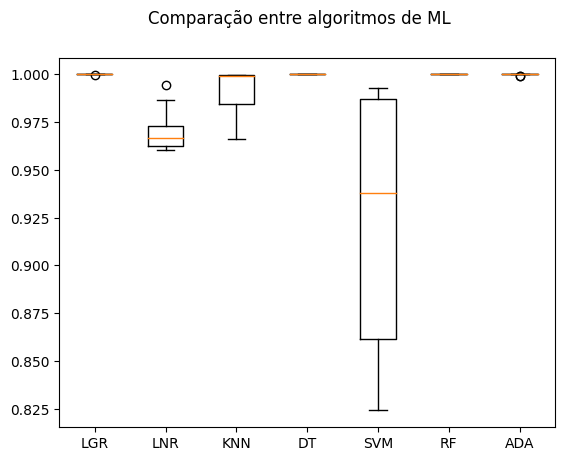

In [23]:
fig = plt.figure()
fig.suptitle('Comparação entre algoritmos de ML')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#fig.savefig('baseline-algorithms.png')

In [24]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
predict = lg.predict(X_test)
explained_variance = metrics.explained_variance_score(y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(y_test, predict) 
mse = metrics.mean_squared_error(y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(y_test, predict)
median_absolute_error = metrics.median_absolute_error(y_test, predict)
r2 = metrics.r2_score(y_test, predict)
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))
#OLS(y_test, predictions).fit().summary()

Ex.V:  0.9882471367215462
MSLE:  0.00018282078155182701
R2  :  0.988242662848962
MAE :  0.000380517503805175
MSE :  0.000380517503805175
RMSE:  0.01950685786602176


In [25]:
ln = LinearRegression()
ln.fit(X_train, y_train)
predict = ln.predict(X_test)
explained_variance = metrics.explained_variance_score(y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(y_test, predict) 
mse = metrics.mean_squared_error(y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(y_test, predict)
median_absolute_error = metrics.median_absolute_error(y_test, predict)
r2 = metrics.r2_score(y_test, predict)
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))
#OLS(y_test, predictions).fit().summary()

Ex.V:  0.19287033301640233
MSLE:  0.012641455420377236
R2  :  0.19284159138749535
MAE :  0.08225510991586484
MSE :  0.026123083728484695
RMSE:  0.16162637077062855


In [26]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predict = knn.predict(X_test)
explained_variance = metrics.explained_variance_score(y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(y_test, predict) 
mse = metrics.mean_squared_error(y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(y_test, predict)
median_absolute_error = metrics.median_absolute_error(y_test, predict)
r2 = metrics.r2_score(y_test, predict)
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))
#OLS(y_test, predictions).fit().summary()

Ex.V:  0.9008799212598425
MSLE:  0.0017212928889690138
R2  :  0.9007680744452398
MAE :  0.006773211567732118
MSE :  0.003211567732115678
RMSE:  0.05667069553230909


In [27]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predict = dt.predict(X_test)
explained_variance = metrics.explained_variance_score(y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(y_test, predict) 
mse = metrics.mean_squared_error(y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(y_test, predict)
median_absolute_error = metrics.median_absolute_error(y_test, predict)
r2 = metrics.r2_score(y_test, predict)
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))
#OLS(y_test, predictions).fit().summary()

Ex.V:  1.0
MSLE:  0.0
R2  :  1.0
MAE :  0.0
MSE :  0.0
RMSE:  0.0


In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)
predict = nb.predict(X_test)
explained_variance = metrics.explained_variance_score(y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(y_test, predict) 
mse = metrics.mean_squared_error(y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(y_test, predict)
median_absolute_error = metrics.median_absolute_error(y_test, predict)
r2 = metrics.r2_score(y_test, predict)
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))
#OLS(y_test, predictions).fit().summary()

Ex.V:  1.0
MSLE:  0.0
R2  :  1.0
MAE :  0.0
MSE :  0.0
RMSE:  0.0


In [29]:
svm = LinearSVR()
svm.fit(X_train, y_train)
predict = svm.predict(X_test)
explained_variance = metrics.explained_variance_score(y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(y_test, predict) 
mse = metrics.mean_squared_error(y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(y_test, predict)
median_absolute_error = metrics.median_absolute_error(y_test, predict)
r2 = metrics.r2_score(y_test, predict)
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))
#OLS(y_test, predictions).fit().summary()

Ex.V:  0.06034214560534623
MSLE:  0.01423312710046584
R2  :  0.0033116703983143703
MAE :  0.09812174713824669
MSE :  0.032257079165098373
RMSE:  0.17960255890465027


In [30]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predict = rf.predict(X_test)
explained_variance = metrics.explained_variance_score(y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(y_test, predict) 
mse = metrics.mean_squared_error(y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(y_test, predict)
median_absolute_error = metrics.median_absolute_error(y_test, predict)
r2 = metrics.r2_score(y_test, predict)
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))
#OLS(y_test, predictions).fit().summary()

Ex.V:  0.9998013766105941
MSLE:  1.7188036664219252e-06
R2  :  0.9998013010021475
MAE :  4.9467275494672755e-05
MSE :  6.430745814307459e-06
RMSE:  0.002535891522582829


In [31]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
predict = ada.predict(X_test)
explained_variance = metrics.explained_variance_score(y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(y_test, predict) 
mse = metrics.mean_squared_error(y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(y_test, predict)
median_absolute_error = metrics.median_absolute_error(y_test, predict)
r2 = metrics.r2_score(y_test, predict)
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))
#OLS(y_test, predictions).fit().summary()

Ex.V:  1.0
MSLE:  0.0
R2  :  1.0
MAE :  0.0
MSE :  0.0
RMSE:  0.0


---

## Algoritmos Classificadores de Machine Learning

---

Acurária: 0.9996
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       1.00      1.00      1.00      2540

    accuracy                           1.00      2628
   macro avg       0.99      1.00      1.00      2628
weighted avg       1.00      1.00      1.00      2628



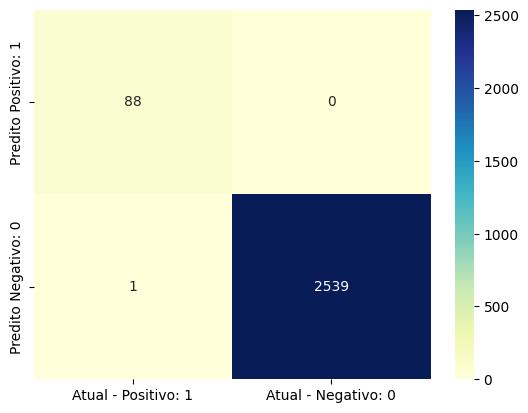

In [32]:
# Regressão Logística (Logistic Regression)

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
#reg = LogisticRegression(solver='liblinear', random_state=0)

# Hyper-parâmetros da RL: penalty, max_iter, C, solver

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import accuracy_score
print('Acurária: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Atual - Positivo: 1', 'Atual - Negativo: 0'], 
                                    index=['Predito Positivo: 1', 'Predito Negativo: 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Guarda as probabilidades preditas em um dataframe
#y_pred_prob_df1 = pd.DataFrame(data=y_pred, columns=['prob.neg', 'prob.pos'])
#y_pred_prob_df1


Acurária: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00      2540

    accuracy                           1.00      2628
   macro avg       1.00      1.00      1.00      2628
weighted avg       1.00      1.00      1.00      2628



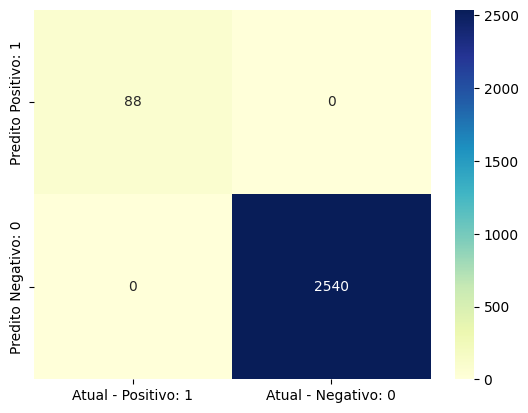

In [33]:
# Árvore de Decisão (Decision Tree)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Hyper-parâmetros: criterion, max_depth, min_samples_split, min_samples_leaf; max_features

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

from sklearn.metrics import accuracy_score
print('Acurária: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Atual - Positivo: 1', 'Atual - Negativo: 0'], 
                                    index=['Predito Positivo: 1', 'Predito Negativo: 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[1 1 1 ... 1 1 1]
Acurária: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00      2540

    accuracy                           1.00      2628
   macro avg       1.00      1.00      1.00      2628
weighted avg       1.00      1.00      1.00      2628



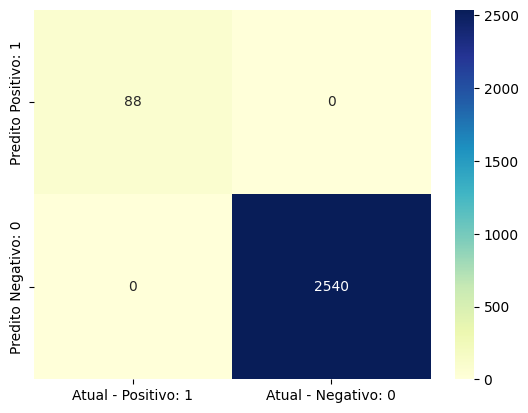

In [38]:
# Floresta Aleatória (Random Forest)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Hyper-parâmetros: n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, boostrap

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(y_pred)

from sklearn.metrics import accuracy_score
print('Acurária: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Atual - Positivo: 1', 'Atual - Negativo: 0'], 
                                    index=['Predito Positivo: 1', 'Predito Negativo: 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Acurária: 0.9665
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.97      1.00      0.98      2540

    accuracy                           0.97      2628
   macro avg       0.48      0.50      0.49      2628
weighted avg       0.93      0.97      0.95      2628



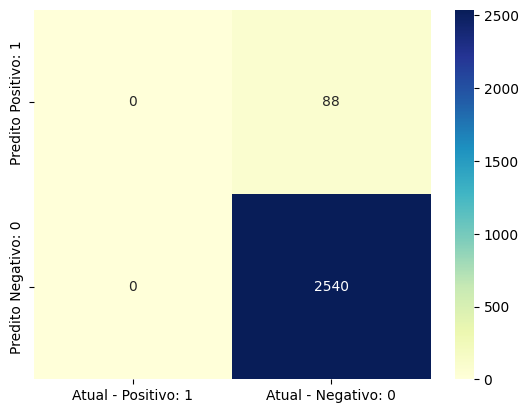

In [35]:
# Máquina de Vetor e Suporte (SVM: Support Vector Machine)

from sklearn.svm import SVC

svc = SVC()

# Hyper-parâmetros: c, kernel, gamma

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score
print('Acurária: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Atual - Positivo: 1', 'Atual - Negativo: 0'], 
                                    index=['Predito Positivo: 1', 'Predito Negativo: 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Acurária: 0.9962
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        88
           1       1.00      1.00      1.00      2540

    accuracy                           1.00      2628
   macro avg       0.98      0.96      0.97      2628
weighted avg       1.00      1.00      1.00      2628



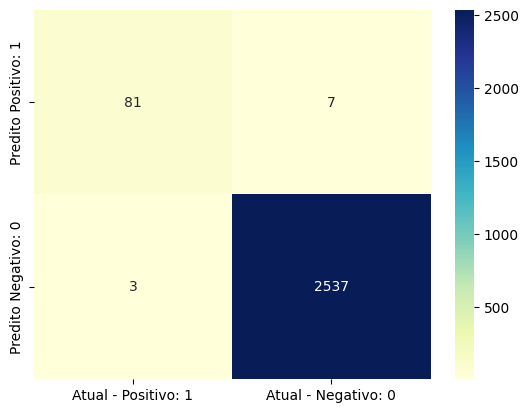

In [36]:
# k-Vizinhos mais Próximos (k-NN: k-Nearest Neighbor)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Hyper-parâmetros: n_neighbors, weights, leaf_size, p

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print('Acurária: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Atual - Positivo: 1', 'Atual - Negativo: 0'], 
                                    index=['Predito Positivo: 1', 'Predito Negativo: 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Acurária: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00      2540

    accuracy                           1.00      2628
   macro avg       1.00      1.00      1.00      2628
weighted avg       1.00      1.00      1.00      2628



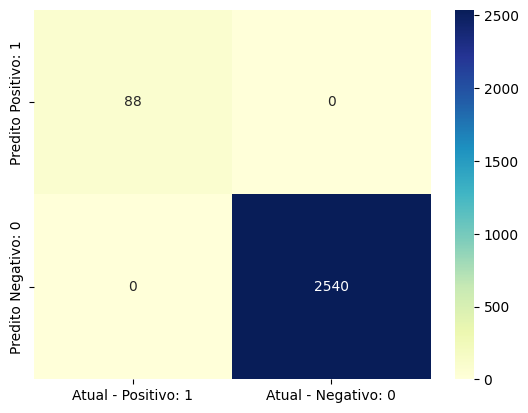

In [37]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Hyper-parâmetros: priors, var_smoothing

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

from sklearn.metrics import accuracy_score
print('Acurária: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Atual - Positivo: 1', 'Atual - Negativo: 0'], 
                                    index=['Predito Positivo: 1', 'Predito Negativo: 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Bons estudos!